## Saving a model to disk

To find out more on the Pima indian dataset challenge visit <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database/home">Kaggle</a>

<p>
    This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.<br>
    The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.<br>
    Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
</p>

In [1]:
import pandas as pd # for reading the csv file
import matplotlib.pyplot as plt # for plotting graphs
import numpy as np # for numerical manipulation

In [2]:
diabetes_csv = pd.read_csv("diabetes.csv") # for reading csv files 

In [3]:
%pylab inline 
"""
-> this is a magic function
-> this is an Ipython command, that allows graphs to be embedded in the notebook.
-> %matplotlib, %pyplot and %pylab wotk the same way only that %pylab imports all needed 
   libraries for graphing using matplotlib
"""

Populating the interactive namespace from numpy and matplotlib


'\n-> this is a magic function\n-> this is an Ipython command, that allows graphs to be embedded in the notebook.\n-> %matplotlib, %pyplot and %pylab wotk the same way only that %pylab imports all needed \n   libraries for graphing using matplotlib\n'

In [4]:
dataset = diabetes_csv # assigning the csv to the dataset variable

In [5]:
dataset.head() # prints the first 5 rows of our csv

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


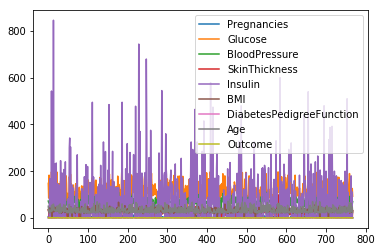

In [6]:
dataset.plot() # this is for plotting our csv data
plt.show() # for plotting in the notebook though it can be oittmed because %pylab inline

## Fix random seed for reproducibility

In [7]:
# setting a random seed ensures reproducibility of the results
seed = 7
np.random.seed(seed)

In [8]:
dataset.shape # shows the number of rows and colums

(768, 9)

In [9]:
dataset.dtypes # shows the data types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# descriptions, change precision to 3 decimal places
pd.set_option('precision', 3)

In [11]:
pd.set_option('display.width', 200)

In [12]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [13]:
# class distribution
dataset.groupby('Outcome').size() # lets you know how many values are assigned for each variable 0 or 1

Outcome
0    500
1    268
dtype: int64

In [14]:
# correlation
dataset.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [15]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Split into input (X) and output (Y) variables

In [16]:
# Prepare Data
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
# spliting helps us map on our training set (X) to your target out come (Y)

## Create DNN Model

In [17]:
import tensorflow as tf # importing tensorflow
from tensorflow import keras # importing keras from the tensorflow library to run any Keras-compatible code

The <code>tf.keras</code> version in the latest TensorFlow release might not be the same as the latest keras version from PyPI (pip installation)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
import os

Using TensorFlow backend.


### Explaining the imports
`from keras.models import Sequential`
<br>
In Keras, you assemble layers to build models. A model is (usually) a graph of layers.<br>
The most common type of model is a stack of layers: the tf.keras.Sequential model.
<br>
<br>
`from keras.layers import Dense`
<br>
Just your regular densely-connected NN layer
<br>
<br>
`from keras.callbacks import ModelCheckpoint, EarlyStopping`
<br>
Callbacks are essentially a set of functions to be applied at different stages of the training procedure.<br>
`ModelCheckpoint`- Save the model after every epoch.<br>
`EarlyStopping`- Stop training when a monitored quantity has stopped improving.<br>
<br>
<br>
`from keras.models import model_from_json`<br>
to save a Keras model into a single HDF5 file which will contain:

    -the architecture of the model, allowing to re-create the model
    -the weights of the model
    -the training configuration (loss, optimizer)
    -the state of the optimizer, allowing to resume training exactly where you left off.


In [19]:
model = Sequential()

model.add(Dense(1024, input_dim=8, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1024, kernel_initializer='uniform', activation='relu'))

model.add(Dense(512, kernel_initializer='uniform', activation='relu'))

model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

## Print the model sumarry

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              9216      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 2,633,729
Trainable params: 2,633,729
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
%%time
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

Wall time: 48 ms


In [22]:
# Save the model according to the conditions
checkpoint = ModelCheckpoint(filepath="diabetes.h5", monitor='acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
"""
Save the model after every epoch.
monitor: quantity to monitor... either val_acc or val_loss
verbose: verbosity mode, 0 or 1.
save_best_only: if save_best_only=True, the latest best model according to the quantity monitored will not be overwritten.
mode: one of {auto, min, max}
    --> auto - will infer from the quantity to monitor
    --> min - is only used  when the monitor = 'val_loss'
    --> max - is only used when monitor = 'val_acc'
save_weights_only: if True, then only the model's weights will be saved
                   else, else the full model is saved
period: Interval (number of epochs) between checkpoints.
"""
model.save("diabetes.h5")

#early stopping in the event there is no improvement in val_acc
early = EarlyStopping(monitor='acc', min_delta=0, patience=10, verbose=1, mode='auto')
# patience is the number of epochs to stop if there no improvement
"""
Stop training when a monitored quantity has stopped improving.

monitor: quantity to be monitored.
min_delta: minimum change in the monitored quantity to qualify as an improvement,
           i.e. an absolute change of less than min_delta, will count as no improvement.
patience: number of epochs with no improvement after which training will be stopped.
verbose: verbosity mode.
mode: one of {auto, min, max}. 
    In min mode, training will stop when the quantity monitored has stopped decreasing; 
    in max mode it will stop when the quantity monitored has stopped increasing; 
    in auto mode, the direction is automatically inferred from the name of the monitored quantity.
"""

'\nStop training when a monitored quantity has stopped improving.\n\nmonitor: quantity to be monitored.\nmin_delta: minimum change in the monitored quantity to qualify as an improvement,\n           i.e. an absolute change of less than min_delta, will count as no improvement.\npatience: number of epochs with no improvement after which training will be stopped.\nverbose: verbosity mode.\nmode: one of {auto, min, max}. \n    In min mode, training will stop when the quantity monitored has stopped decreasing; \n    in max mode it will stop when the quantity monitored has stopped increasing; \n    in auto mode, the direction is automatically inferred from the name of the monitored quantity.\n'

### Fit the model

In [23]:
%%time
model.fit(X, Y, epochs=250, batch_size=10, callbacks = [checkpoint, early])

Epoch 1/250
768/768 [==============================] - 6s 7ms/step - loss: 5.6220 - acc: 0.6406

Epoch 00001: acc improved from -inf to 0.64063, saving model to diabetes.h5
Epoch 2/250
768/768 [==============================] - 7s 9ms/step - loss: 5.6245 - acc: 0.6510

Epoch 00002: acc improved from 0.64063 to 0.65104, saving model to diabetes.h5
Epoch 3/250
768/768 [==============================] - 5s 7ms/step - loss: 5.6245 - acc: 0.6510

Epoch 00003: acc did not improve from 0.65104
Epoch 4/250
768/768 [==============================] - 5s 7ms/step - loss: 5.6245 - acc: 0.6510

Epoch 00004: acc did not improve from 0.65104
Epoch 5/250
768/768 [==============================] - 5s 7ms/step - loss: 5.6245 - acc: 0.6510

Epoch 00005: acc did not improve from 0.65104
Epoch 6/250
768/768 [==============================] - 5s 7ms/step - loss: 5.6245 - acc: 0.6510

Epoch 00006: acc improved from 0.65104 to 0.65104, saving model to diabetes.h5
Epoch 7/250
768/768 [=========================

### Evaluate the model

In [24]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 464us/step
acc: 65.10%


In [25]:

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [26]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Loaded model from disk
acc: 65.10%


# We can improve out model accuracy but point of the lecture today was 
# to teach how to save a model

### Shout out to our sponsor

![Deep Analytics](img/Deep_Analytics.png)

visit their <a href="http://deepanalytics.ai/">website</a>

Like their <a href="https://www.facebook.com/DeepAnalyticsAI/">Facebook page</a>

![School of AI](img/School_of_ai_logo.png)

<a href="https://www.facebook.com/groups/harareschoolofai/">Join our Facebook Group</a>

![GitHub](img/github_logo.png)

<a href="https://github.com/HarareSchoolOfAI/">Download more from our GitHub repository</a>